In [1]:
!pip install pyarrow

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_parquet("../data/yellow_tripdata_2023-01.parquet")

In [5]:
df.shape

(3066766, 19)

In [6]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [7]:
df["duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]
df["duration_in_minutes"] = df["duration"].apply(lambda x: x.total_seconds() / 60)

In [8]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_in_minutes
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,...,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,0 days 00:13:59,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,...,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,0 days 00:19:27,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,...,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,0 days 00:24:31,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,...,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,0 days 00:13:00,13.000000


In [9]:
# sns.distplot(df["duration_in_minutes"])

In [10]:
df["duration_in_minutes"].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration_in_minutes, dtype: float64

In [11]:
4.259435e+01

42.59435

In [12]:
df_without_outliers = df[
    (df["duration_in_minutes"] >= 1)
    & (df["duration_in_minutes"] <= 60)
]

In [13]:
# sns.distplot(df_without_outliers["duration_in_minutes"])

In [14]:
df_without_outliers.shape[0] / df.shape[0] * 100

98.1220282212598

In [15]:
categorical = ["PULocationID", "DOLocationID"]
numerical = ["duration_in_minutes"]

In [16]:
df_without_outliers["PULocationID"] = df_without_outliers["PULocationID"].astype(str)

/tmp/ipykernel_2102/575927855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers["PULocationID"] = df_without_outliers["PULocationID"].astype(str)


In [17]:
df_without_outliers[categorical] = df_without_outliers[categorical].astype(str)

/tmp/ipykernel_2102/2581483071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_outliers[categorical] = df_without_outliers[categorical].astype(str)


In [18]:
train_dict = df_without_outliers[categorical].to_dict(orient="records")

In [49]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [50]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [51]:
len(dv.feature_names_)

515

In [22]:
target = "duration_in_minutes"
y_train = df_without_outliers[target].values

In [23]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


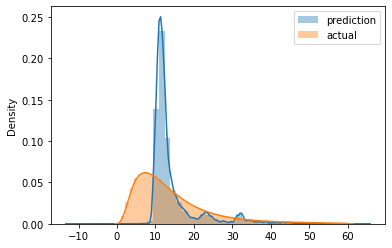

In [27]:
sns.distplot(y_pred, label="prediction")
sns.distplot(y_train, label="actual")

plt.legend()

In [28]:
mean_squared_error(y_train, y_pred, squared=False)

7.649261027855596

In [37]:
df_valid = pd.read_parquet("../data/yellow_tripdata_2023-02.parquet")

In [38]:
df_valid["duration"] = df_valid["tpep_dropoff_datetime"] - df_valid["tpep_pickup_datetime"]
df_valid["duration_in_minutes"] = df_valid["duration"].apply(lambda x: x.total_seconds() / 60)

df_valid[categorical] = df_valid[categorical].astype(str)

In [39]:
df_valid = df_valid[
    (df_valid["duration_in_minutes"] >= 1)
    & (df_valid["duration_in_minutes"] <= 60)
]

In [52]:
val_dict = df_valid[categorical].to_dict(orient="records")
X_val = dv.transform(val_dict)

In [53]:
y_valid = df_valid[target].values

In [54]:
y_pred = lr.predict(X_val)

In [56]:
mean_squared_error(y_valid, y_pred, squared=False)

7.8118325109416915